# Will It Rain Tomorrow

Side Note: 

The balanced data is new_df 

unbalanced data is df

# Data Acquisition

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


data = '/content/drive/My Drive/weatherAUS.csv'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
df = pd.read_csv(data)
#confirm our file was read in OK
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


# Data Cleaning and EDA

## Dataset Dimensionality

In [7]:
print(df.shape)
#142193 instances and 24 variables

(142193, 24)


In [8]:
print(df.ndim)
#2 dimensional

2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [10]:
df.describe()
#note that the min for some of the columns are very different. The min for MinTemp is -8.5, whereas the mind for Humidity9am is 0.07
#LAter we will need to even this out through scaling

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


## Removing Nulls

In [11]:
#Checking how many nulls each column has.
df.isnull().sum().sort_values()

Date                 0
RISK_MM              0
RainTomorrow         0
Location             0
MaxTemp            322
MinTemp            637
Temp9am            904
WindSpeed9am      1348
Rainfall          1406
RainToday         1406
Humidity9am       1774
WindSpeed3pm      2630
Temp3pm           2726
Humidity3pm       3610
WindDir3pm        3778
WindGustSpeed     9270
WindGustDir       9330
WindDir9am       10013
Pressure3pm      13981
Pressure9am      14014
Cloud9am         53657
Cloud3pm         57094
Evaporation      60843
Sunshine         67816
dtype: int64

In [12]:
df['RainTomorrow'].isnull().values.any()

False

We need to decide which columns we do not require for this analysis. We will take into account the number of nulls the columns have and which will contribute to our analysis.

We will remove the following:
1. RISK_MM will leak information to our model, therefore we should remove it.
2. Location
3. Date
4. Sunshine
5. Evaporation
6. Cloud3pm
7. Cloud9am

We should remove the columns with a lot of Nan values 

In [0]:
#We must drop the RISK_MM variable because it will leak information to our model which could affect ther results
df.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','RISK_MM', 'Date'], axis=1, inplace=True)

In [14]:
#We should now have 17 variables.
df.shape

(142193, 17)

our most important column is the rainTomorrow column as this will be our target vector
So we need to confirm this doesn't have any nulls.

In [15]:
#Removing all null values in df
#
df = df.dropna(how='any')
print( df.isnull().sum().sort_values(), df.shape)


MinTemp          0
Temp3pm          0
Temp9am          0
Pressure3pm      0
Pressure9am      0
Humidity3pm      0
Humidity9am      0
RainToday        0
WindSpeed3pm     0
WindDir3pm       0
WindDir9am       0
WindGustSpeed    0
WindGustDir      0
Rainfall         0
MaxTemp          0
WindSpeed9am     0
RainTomorrow     0
dtype: int64 (112925, 17)


We had 142193 instances and now we have 112925 after removing all the nulls.

In [0]:
#df['Date'] = pd.to_datetime(df['Date'])
#df['Year'] = pd.to_datetime(df['Date']).dt.year
#df['Month'] = pd.to_datetime(df['Date']).dt.month
#df.set_index('Date', inplace=True)
#df.head()

## Removing Outliers

In [17]:
#Use of Z-score to remove outliers
#copied straight from https://www.kaggle.com/aninditapani/will-it-rain-tomorrow
#TODO go back over this and see if theres another way to check for outliers?
from scipy import stats
z = np.abs(stats.zscore(df._get_numeric_data()))
print(z)
df= df[(z < 3).all(axis=1)]
print(df.shape)

 #zscore gives you an idea of how far from the mean a data point is.
#A z-score can tell you where that person’s weight is compared to the average population’s mean weight.

[[0.11756741 0.10822071 0.20666127 ... 1.14245477 0.08843526 0.04787026]
 [0.84180219 0.20684494 0.27640495 ... 1.04184813 0.04122846 0.31776848]
 [0.03761995 0.29277194 0.27640495 ... 0.91249673 0.55672435 0.15688743]
 ...
 [1.44940294 0.23548728 0.27640495 ... 0.58223051 1.03257127 0.34701958]
 [1.16159206 0.46462594 0.27640495 ... 0.25166583 0.78080166 0.58102838]
 [0.77784422 0.4789471  0.27640495 ... 0.2085487  0.37167606 0.56640283]]
(107868, 17)


# Data Pre-Processing

##Encoding Categorical Data

In [18]:
#Check which columns are categorical and need to be encoded
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107868 entries, 0 to 142192
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        107868 non-null  float64
 1   MaxTemp        107868 non-null  float64
 2   Rainfall       107868 non-null  float64
 3   WindGustDir    107868 non-null  object 
 4   WindGustSpeed  107868 non-null  float64
 5   WindDir9am     107868 non-null  object 
 6   WindDir3pm     107868 non-null  object 
 7   WindSpeed9am   107868 non-null  float64
 8   WindSpeed3pm   107868 non-null  float64
 9   Humidity9am    107868 non-null  float64
 10  Humidity3pm    107868 non-null  float64
 11  Pressure9am    107868 non-null  float64
 12  Pressure3pm    107868 non-null  float64
 13  Temp9am        107868 non-null  float64
 14  Temp3pm        107868 non-null  float64
 15  RainToday      107868 non-null  object 
 16  RainTomorrow   107868 non-null  object 
dtypes: float64(12), object(5)
mem

There are 5 categorical columns which we can convert to numberical.
We need to look at a breakdown of these columns

The rainToday and RainTomorrow will be cocnverted to binary 1's and 0's.
TODO Write explanation of the wind dir column convertion

In [19]:
#Check how many values need to be converted
cat_cols_one = ['RainToday', 'RainTomorrow']

for col in cat_cols_one:
  print(col, df[col].unique())


RainToday ['No' 'Yes']
RainTomorrow ['No' 'Yes']


In [0]:
#Convert to binary

for i in cat_cols_one:
  df[i].replace({'No': 0, 'Yes': 1},inplace = True)

#df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
#df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [21]:
df[['RainToday', 'RainTomorrow']]

,RainToday,RainTomorrow
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
142188,0,0
142189,0,0
142190,0,0
142191,0,0


In [22]:
#Convert our other 3 categorical columns
cat_col_two = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
for col in cat_col_two:
    print(np.unique(df[col]))

['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


In [0]:
#use get_dummies to split out the direction indicators variables into a df
df = pd.get_dummies(df, columns = cat_col_two)

In [24]:
#Confirm changes have been made
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N',
       'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
       'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
       'WindGustDir_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE',
       'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW',
       'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE',
       'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW',
       'WindDir3pm_WSW', 'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE',
       'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW',
       'WindDir9am_NW', 'W

In [25]:
df.iloc[4:9]

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,18.1,24.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,18.3,30.2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


## Scaling the data

In [26]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(df) #Compute the minimum and maximum to be used for later scaling.
#transform() = scaling features of X according to feature_range.
df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)
df.iloc[4:10]

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
4,0.628342,0.696296,0.035714,0.465753,0.135135,0.428571,0.797753,0.33,0.342043,0.282974,0.502660,0.672589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.550802,0.632099,0.007143,0.671233,0.459459,0.523810,0.494382,0.23,0.304038,0.268585,0.577128,0.652284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.542781,0.516049,0.000000,0.589041,0.486486,0.523810,0.426966,0.19,0.313539,0.335731,0.510638,0.543147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.366310,0.558025,0.000000,0.383562,0.108108,0.357143,0.415730,0.19,0.403800,0.381295,0.462766,0.565990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.419786,0.686420,0.000000,1.000000,0.135135,0.619048,0.348315,0.09,0.296912,0.225420,0.515957,0.685279,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.510695,0.641975,0.050000,0.287671,0.351351,0.214286,0.528090,0.27,0.251781,0.275779,0.563830,0.634518,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Balancing out our target vector.

pauls:
**We need to determine if our predictor variable 'RainTomorrow' is well balanced.**


*   Cell 1: Counts of No(0.0) and Yes(1.0) instances in the 'RainTomorrow' column.
*   Cell 2: Percentage of No(0.0) and Yes(1.0) instances in the 'RainTomorrow' column.
*   Cell 3: Graph describing instances of No(0.0) and Yes(1.0) instances in the 'RainTomorrow' column.


In [27]:
df['RainTomorrow'].value_counts()

0.0    85475
1.0    22393
Name: RainTomorrow, dtype: int64

In [28]:
no_rain = len(df[df['RainTomorrow']==0])
rain = len(df[df['RainTomorrow']==1])

pct_of_no_rain = no_rain/(no_rain+rain)
print("Percentage of 'RainTomorrow'=0 is: ", pct_of_no_rain*100)

pct_of_rain = rain/(no_rain+rain)
print("Percentage of 'RainTomorrow'=1' is: ", pct_of_rain*100)

Percentage of 'RainTomorrow'=0 is:  79.24036785701041
Percentage of 'RainTomorrow'=1' is:  20.759632142989577


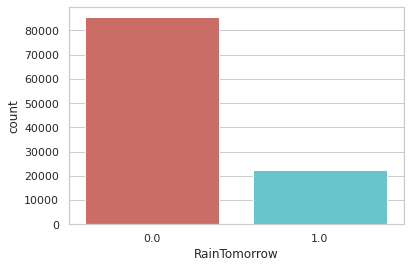

In [29]:
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

sns.countplot(x='RainTomorrow', data=df, palette='hls')
plt.show()

**From the above, we can conclude that our predictor variable 'RainTomorrow' is not well balanced.** To deal with this, we're going to up-sample the Yes(1.0) using the SMOTE algorithm. To ensure this has been done correctly, we observe the output from the following cell.

* **Dealing With Imbalance:** *One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.*

In [30]:
from sklearn.model_selection import train_test_split

X_b = df.loc[:, df.columns != 'RainTomorrow']
y_b = df.loc[:, df.columns == 'RainTomorrow']

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.2, random_state=0)
columns_b = X_train_b.columns
os_data_X,os_data_y=os.fit_sample(X_train_b, y_train_b)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns_b )
os_data_y= pd.DataFrame(data=os_data_y,columns=['RainTomorrow'])

# Merge the dataframes to create a new 'balanced' dataframe.
new_df = os_data_X
new_df['RainTomorrow'] = os_data_y

# Check the data to ensure it is correct:
print("Length of oversampled data: ", len(os_data_X))
print("Number of RainTomorrow=0 in oversampled data: ", len(os_data_y[os_data_y['RainTomorrow']==0]))
print("Number of RainTomorrow=1 in oversampled data: ", len(os_data_y[os_data_y['RainTomorrow']==1]))
print("Proportion of RainTomorrow=0 in oversampled data: ", len(os_data_y[os_data_y['RainTomorrow']==0])/len(os_data_X))
print("Proportion of RainTomorrow=1 in oversampled data: ", len(os_data_y[os_data_y['RainTomorrow']==1])/len(os_data_X))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

Length of oversampled data:  136692
Number of RainTomorrow=0 in oversampled data:  68346
Number of RainTomorrow=1 in oversampled data:  68346
Proportion of RainTomorrow=0 in oversampled data:  0.5
Proportion of RainTomorrow=1 in oversampled data:  0.5


**Check to make sure our new sample is well balanced.**

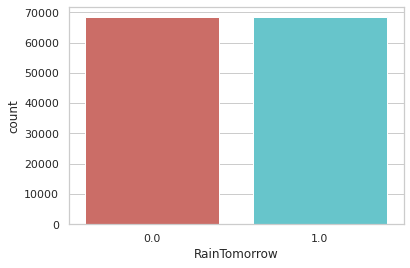

In [31]:
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

sns.countplot(x='RainTomorrow', data=new_df, palette='hls')
plt.show()

## Saving clean and balanced data to CSV

In [0]:
#This will put the clean dataset file in your drive
new_df.to_csv('/content/drive/My Drive/balancedCleanData.csv') 

## END OF CLEANING

## All the code below is with the unbalanced dataset

Keeping this because going to use it to compare results with the balanced dataset.

Doing code for balanced dataset in another colab

# Decision Tree Implementation On Unbalanced Data And All (61) Features

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
X = df.loc[:,df.columns!='RainTomorrow']
y = df['RainTomorrow'] 

x_train_ua, x_test_ua, y_train_ua, y_test_ua = train_test_split(X, y, test_size=0.20, random_state=1)

dtClassifierua = DecisionTreeClassifier() #u = unbalanced a =all features
dtClassifierua.fit(x_train_ua,y_train_ua)
y_pred_ua = dtClassifierua.predict(x_test_ua)
#print("Decision Tree Classifier Naive Bayes score: " , dtClassifierua.score(y_test_ua, y_pred_ua))

acc_decision_tree_ua = accuracy_score(y_test_ua , y_pred_ua) #*100
print("Classification Accuracy Score unbalanced data on ALL features: ", acc_decision_tree_ua)

Classification Accuracy Score unbalanced data on ALL features:  0.7872902567905813


# Decision Tree Implementation On Unbalanced Data And 3 Features


In [34]:
#https://www.kaggle.com/cagiriozden/knn-nb-dec-tree-random-forest-weatherprediction
#Lets divide our features..
#X is our ? and y is our target vector
X = df.loc[:,df.columns!='RainTomorrow']
y = df['RainTomorrow'] #this is what we want to predict
print(X.shape, y.shape)

(107868, 61) (107868,)


The classes in the sklearn.feature_selection module can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.

## Feature Selection

### Feature selection method: SelectKBest

In [35]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split

#The Chi-square test is intended to test how likely it is that an observed distribution is due to chance.
#k = Number of top features to select.
#TODO CHANGE THIS TO 3
selector = SelectKBest(chi2, k=3)
selector.fit_transform(X, y) #Fit to data, then transform it.
#get_support() Get a mask, or integer index, of the features selected
#so these are the best features to use
print(X.columns[selector.get_support(indices=True)])

#Lets change our training data set with the best features calculated by feature selection..
#update X which is our feature matrix
#Our feature matri X now only has the best features.
X = df[X.columns[selector.get_support(indices=True)]]


Index(['Rainfall', 'Humidity3pm', 'RainToday'], dtype='object')


## Splitting up data into train and test

In [36]:
#spliting data for train and test
#train and test data for our feature matrix and target vector
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

#note that X previously has 63 features and now only has 4.
#make sure training and test split properly
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(86294, 3) (21574, 3) (86294,) (21574,)


## Training Decision Tree Mode

In [37]:
#i made a new X_new which has only the good features or the most useful features 
#but i didnt actually use it for any of the code below like an ejet
#so need to go through this code and fix that and use X_new
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtClassifier = DecisionTreeClassifier()
dtClassifier.fit(x_train,y_train)
y_pred_DT = dtClassifier.predict(x_test)
#print("Decision Tree Classifier Naive Bayes score: " , dtClassifier.score(x_test, y_test))
ac_dt_b_f = accuracy_score(y_test, y_pred_DT)
print("Classification Accuracy Score on UNbalanced data with feature selection done (3 features choosen)", ac_dt_b_f)

Classification Accuracy Score on UNbalanced data with feature selection done (3 features choosen) 0.8294243070362474


## Classification Report Decision tree 

In [38]:
from sklearn.metrics import classification_report
report_f_ub = classification_report(y_test, y_pred_DT )
print(report_f_ub)

              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90     17107
         1.0       0.67      0.34      0.45      4467

    accuracy                           0.83     21574
   macro avg       0.76      0.65      0.68     21574
weighted avg       0.81      0.83      0.81     21574



## Decision Tree Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known.

true positive, 1, 1 = In the confusion matrix below we see there are 1245 for 1 and 1 . so true positive. We are not expecting a lot of rain to happen in 
Australia anyway. so i think this is for predicting "Yes it will rain tomo"

True NEgative 0, 0= theres 11,781 which is a lot! We expect there to 
be loads of days not raining.

Flase positive, predicted 1, true 0 = (Type 1 Error) = 1,028

False Negative: (Type 2 Error)



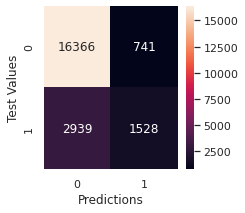

In [39]:
import matplotlib.pyplot as plt
import matplotlib.style as sty
import seaborn as sns
from sklearn.metrics import confusion_matrix

confMatDT = confusion_matrix(y_test,y_pred_DT)


f, ax = plt.subplots(figsize = (3,3))
sns.heatmap(confMatDT,annot=True,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predictions")
plt.ylabel("Test Values")
plt.show()

## F-score to test accuracy 

In [40]:
#not sure which average to use here so just used macros, thers others like micro and weighted too.

from sklearn.metrics import f1_score
f1_score(y_test, y_pred_DT, average='macro')

0.6763080637194336

## ROC Curve to check fro accuracy too



As we can see the AUC here is 65. This is a really poor score when we compare this with the AUC of the balanced data in the file DTBalancedData.ipynb

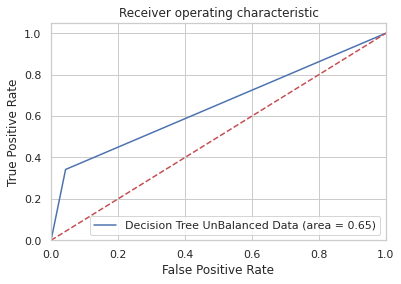

In [47]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


dt_roc_auc = roc_auc_score(y_test, y_pred_DT)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_DT)
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree UnBalanced Data (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
